In [1]:
import vars.model_run as mod
from torchvision import transforms
import torch

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mehdialmousavi (mehdialmoo). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/s5602288/.netrc


In [2]:
PATH = "./Data/Chess/"
CSV_PATH =  "./Data/"
BATCH = 32
RATIO = [0.6,0.2,0.2]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

cuda


Splited data : tain sample number:667
                  
validation sample number:222
                    
test sample number:222


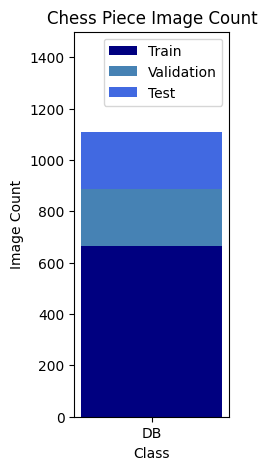

In [3]:
model = mod.model_run(data_directory=PATH, transformer=transform, batch_size=BATCH, ratio=RATIO, epoch=10)


In [4]:
model.setup()
model.train_run()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
You are using a CUDA device ('NVIDIA GeForce RTX 4080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | conv1 | Conv2d | 168   
1 | conv2 | Conv2d | 880   
2 | fc1   | Linear | 5.6 M 
3 | fc2   | Linear | 10.2 K
4 | fc3   | Linear | 1.7 K 
5 | fc4   | Linear | 126   
---------------------------------
5.6 M     Trainable params
0         Non-trainable params
5.6 M     Total params
22.448    Total estimated model params size (MB)
/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (21) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for 

Epoch 9: 100%|██████████| 21/21 [00:02<00:00,  8.69it/s, v_num=wma9]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 21/21 [00:06<00:00,  3.20it/s, v_num=wma9]


In [5]:
model.validation_run()

/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.validate(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.validate(ckpt_path='best')` to use the best model or `.validate(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/bzzlwma9/checkpoints/epoch=9-step=210.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/bzzlwma9/checkpoints/epoch=9-step=210.ckpt
/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/p

Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 13.33it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val_acc             0.522522509098053
        val_loss            1.3164465427398682
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [6]:
model.test_run()

/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at ./lightning_logs/bzzlwma9/checkpoints/epoch=9-step=210.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/bzzlwma9/checkpoints/epoch=9-step=210.ckpt
/home/s5602288/miniconda3/envs/SE_ENV/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 15.32it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc                    0.5
        test_loss            1.426877737045288
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [7]:
model.evaluation()

              precision    recall  f1-score   support

      Bishop     0.4333    0.3023    0.3562        43
        King     0.8261    0.5429    0.6552        35
      Knight     0.5833    0.5676    0.5753        37
        Pawn     0.4583    0.5238    0.4889        21
       Queen     0.3571    0.5000    0.4167        40
        Rook     0.6038    0.6957    0.6465        46

    accuracy                         0.5225       222
   macro avg     0.5437    0.5220    0.5231       222
weighted avg     0.5442    0.5225    0.5234       222



In [8]:
# datloader
"""
print(data.labels)
print(len(data))
print(data.dir_list)
"""

'\nprint(data.labels)\nprint(len(data))\nprint(data.dir_list)\n'

In [9]:
"""
# util 
create_CSV(dir=data.dir, out_dir=CSV_PATH)
plot_bar(data.dir,data.labels)
plot_img(dir_list=data.dir_list, labels= data.labels)
pre_process(dir_list=data.dir_list)
"""


'\n# util \ncreate_CSV(dir=data.dir, out_dir=CSV_PATH)\nplot_bar(data.dir,data.labels)\nplot_img(dir_list=data.dir_list, labels= data.labels)\npre_process(dir_list=data.dir_list)\n'

In [10]:
"""
# dataloader
data.db_split(train_ratio=0.6, valid_ratio=0.2, test_ratio=0.2)
trainDB = data.train_dataloader()
validDB = data.valid_dataloader()
testDB = data.test_dataloader()
"""

'\n# dataloader\ndata.db_split(train_ratio=0.6, valid_ratio=0.2, test_ratio=0.2)\ntrainDB = data.train_dataloader()\nvalidDB = data.valid_dataloader()\ntestDB = data.test_dataloader()\n'

In [11]:
"""
from pytorch_lightning.loggers import WandbLogger
import wandb
wandb.login(key="f2dff4d9b4135a7933dfe4796a30db28811a5c5e")
# model
"""

'\nfrom pytorch_lightning.loggers import WandbLogger\nimport wandb\nwandb.login(key="f2dff4d9b4135a7933dfe4796a30db28811a5c5e")\n# model\n'